In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
import warnings
warnings.filterwarnings("ignore")

In [2]:
## initial conditions
b0=2
r0=1
N=100
tmax=20
t = np.linspace(0.,tmax, N)
init = [b0, r0]
## The function definition  lotka-Volterra function
def lotka(Z, t):
    B, R = Z
    dB = B * (1 - R)
    dR = R * (-1+ B)
    return np.array([dB, dR])

### Runge-Kutta Function

In [3]:
## The definition of rungekutta method function
def Runge(func, B0, t):
    dt = t[1] - t[0]
    N= len(t)
    B  = np.zeros([N,len(B0)])
    B[0] = B0
    for i in range(N-1):
        k1 = func(B[i], t[i])
        k2 = func(B[i] + dt/2. * k1, t[i] + dt/2.)
        k3 = func(B[i] + dt/2. * k2, t[i] + dt/2.)
        k4 = func(B[i] + dt* k3, t[i] + dt)
        B[i+1] = B[i] + dt / 6. * (k1 + 2. * k2 + 2. * k3 + k4)
    return B

#### Plotting of the rungekutta result

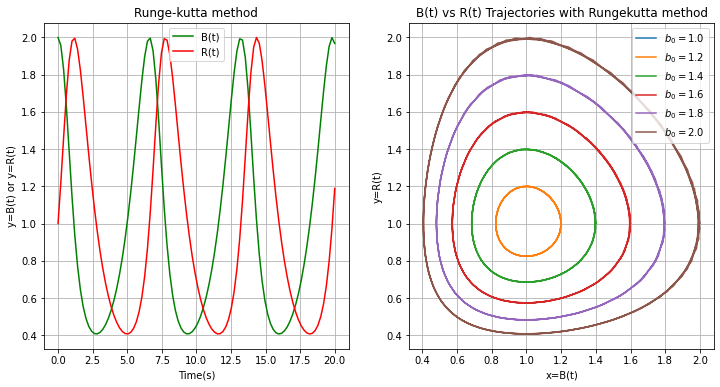

In [4]:
## Function call
res1= Runge(lotka, init, t)
## Plot of rungekutta result
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Runge-kutta method")
plt.plot(t,res1[:,0], 'g', label = 'B(t)')
plt.plot(t,res1[:,1], 'r', label = "R(t)")
plt.grid()
plt.xlabel("Time(s)")
plt.ylabel('y=B(t) or y=R(t)')
plt.legend(loc = "upper center")
plt.subplot(1,2,2)
## RungeKutta trajectories
initial = np.linspace(1, 2, 6) # initial conditions for population (prey)
for i in initial:
    init= [i, 1]
    res1= Runge(lotka, init, t)
    plt.plot(res1[:,0],res1[:,1], "-", label = "$b_0 =$"+str(init[0]))
plt.xlabel("x=B(t)")
plt.ylabel("y=R(t)")
plt.grid()
plt.legend(loc="upper right")
plt.title("B(t) vs R(t) Trajectories with Rungekutta method");
plt.show();

### Euler Method

In [5]:
## Definition of the euler method function
def Euler(func, B0, t):
    dt = t[1] - t[0]
    nt = len(t)
    B  = np.zeros([nt, len(B0)])
    B[0] = B0
    for i in range(nt-1):
        B[i+1] = B[i] + func(B[i], t[i]) * dt
    return B

#### Plotting of the Euler method result

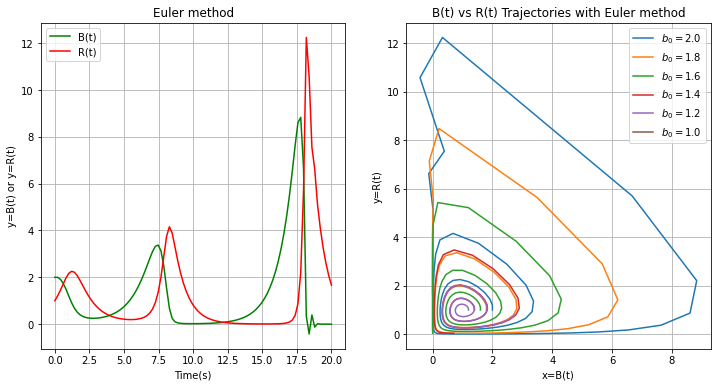

In [6]:
res = Euler(lotka, init, t)
plt.figure(figsize=(12,6));
plt.subplot(1,2,1)
plt.title("Euler method")
plt.plot(t, res[:,0], 'g', label = 'B(t)')
plt.plot(t, res[:,1], 'r', label = "R(t)")
plt.grid()
plt.xlabel("Time(s)")
plt.ylabel('y=B(t) or y=R(t)')
plt.legend()
plt.subplot(1,2,2)
## Euler trajectories
init = np.linspace(2, 1, 6) # initial conditions for population (prey)
for i in init:
    init = [i, 1]
    res1 = Euler(lotka, init, t)
    plt.plot(res1[:,0],res1[:,1], "-", label = "$b_0 =$"+str(init[0]))
plt.xlabel("x=B(t)")
plt.ylabel("y=R(t)")
plt.grid()
plt.legend(loc="upper right");
plt.title("B(t) vs R(t) Trajectories with Euler method");
plt.show();

## Changing the initial conditions

In [7]:
## initial conditions
b0=6
r0=3
N1=1000
tmax1=20
t1 = np.linspace(0.,tmax1, N1)
init1 = [b0, r0]

#### Plotting of the rungekutta result with changed initial variables

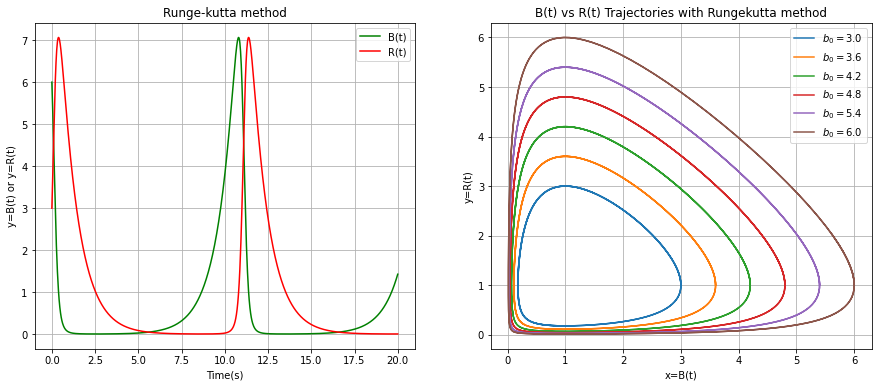

In [8]:
## Function call
res1= Runge(lotka, init1, t1)
## Plot of rungekutta result
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Runge-kutta method")
plt.plot(t1,res1[:,0], 'g', label = 'B(t)')
plt.plot(t1,res1[:,1], 'r', label = "R(t)")
plt.grid()
plt.xlabel("Time(s)")
plt.ylabel('y=B(t) or y=R(t)')
plt.legend(loc="upper right")
plt.subplot(1,2,2)
## RungeKutta trajectories
initial = np.linspace(3, 6, 6) # initial conditions for population (prey)
for i in initial:
    init1= [i, 1]
    res1= Runge(lotka, init1, t1)
    plt.plot(res1[:,0],res1[:,1], "-", label = "$b_0 =$"+str(init1[0]))
plt.xlabel("x=B(t)")
plt.ylabel("y=R(t)")
plt.grid()
plt.legend(loc="upper right")
plt.title("B(t) vs R(t) Trajectories with Rungekutta method");
plt.show();

#### Plotting of the Euler method result with changed initial variables

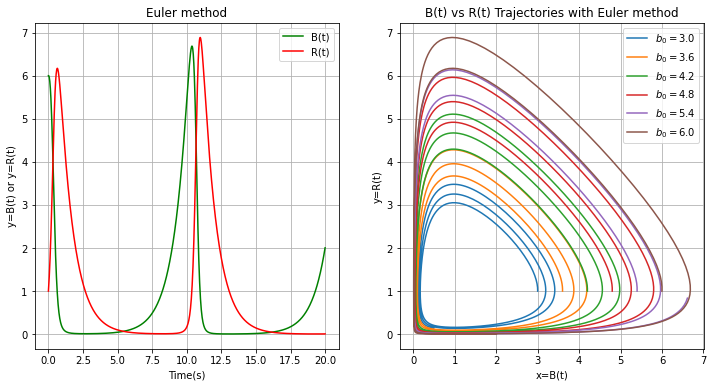

In [9]:
res = Euler(lotka, init1, t1)
plt.figure(figsize=(12,6));
plt.subplot(1,2,1)
plt.title("Euler method")
plt.plot(t1, res[:,0], 'g', label = 'B(t)')
plt.plot(t1, res[:,1], 'r', label = "R(t)")
plt.grid()
plt.xlabel("Time(s)")
plt.ylabel('y=B(t) or y=R(t)')
plt.legend()
plt.subplot(1,2,2)
## Euler trajectories
initial = np.linspace(3, 6, 6) # initial conditions for population (prey)
for i in initial:
    init1 = [i, 1]
    res1 = Euler(lotka, init1, t1)
    plt.plot(res1[:,0],res1[:,1], "-", label = "$b_0 =$"+str(init1[0]))
plt.xlabel("x=B(t)")
plt.ylabel("y=R(t)")
plt.grid()
plt.legend(loc="upper right");
plt.title("B(t) vs R(t) Trajectories with Euler method");
plt.show();

#### Conclusion

###### The  Runge kutta methods is good but Euler is more accurate than it  because it give us the best solution even  for the trajectories.
##### The Runge kutta consider 4 steps of $\Delta t$ while euler consider 1 change.
##### Even if we consider the trajectories of runge kutta method it is has good solutions figure that is understandable as periodically plotted.
##### After taking the large enough time step we can see that the runge kutta and euler are approximately the same results but different trajectories.